In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [23]:
df=pd.read_csv('dataset.csv')

In [24]:
#Loại bỏ các trường không dùng và các giá trị bị NaN quá nhiều
df.dropna(subset=["Giá/m2","Kinh độ","Loại hình nhà ở","Chiều ngang","Chiều dọc","Mật độ dân số"], inplace=True)
df=df.drop(labels=["Giấy tờ pháp lý","Đặc điểm nhà đất","Quận huyện","Tỉnh thành","Tình trạng nội thất","Hướng cửa chính","Unnamed: 0","Số tầng","Diện tích sử dụng","Unnamed: 0.1"], axis=1, inplace=False)

#Định dạng chuẩn dữ liệu cho chiều ngang, chiều rộng, Giá/m^2
df['Chiều ngang'] =df['Chiều ngang'].map(lambda x: x.lstrip('').rstrip('m'))
df['Chiều dọc'] =df['Chiều dọc'].map(lambda x: x.lstrip('').rstrip('m'))
df["Giá/m2"]=df["Giá/m2"].str.replace(',','.')

#Định dạng chuẩn dữ liệu cho loại hình nhà ở
df['Loại hình nhà ở'] = df['Loại hình nhà ở'].replace(to_replace=["Nhà ngõ"], value = 1)
df['Loại hình nhà ở'] = df['Loại hình nhà ở'].replace(to_replace=["Nhà phố liền kề"], value = 1.2)
df['Loại hình nhà ở'] = df['Loại hình nhà ở'].replace(to_replace=["Nhà mặt phố"], value = 1.6)
df['Loại hình nhà ở'] = df['Loại hình nhà ở'].replace(to_replace=["Nhà biệt thự"], value = 3)



#Chuyển đổi kiểu dữ liệu là numeric
df['Số phòng ngủ']=pd.to_numeric(df['Số phòng ngủ'], errors='coerce')
df['Số phòng vệ sinh']=pd.to_numeric(df['Số phòng vệ sinh'], errors='coerce')
df['Giá/m2']=pd.to_numeric(df['Giá/m2'], errors='coerce')
df['Loại hình nhà ở']=pd.to_numeric(df['Loại hình nhà ở'], errors='coerce')
df['Diện tích đất']=pd.to_numeric(df['Diện tích đất'], errors='coerce')
df['Chiều ngang']=pd.to_numeric(df['Chiều ngang'], errors='coerce')
df['Chiều dọc']=pd.to_numeric(df['Chiều dọc'], errors='coerce')
df['Kinh độ']=pd.to_numeric(df['Kinh độ'], errors='coerce')
df['Vĩ độ']=pd.to_numeric(df['Vĩ độ'], errors='coerce')
df.dropna(subset=["Giá/m2"], inplace=True)

#Thay thế NaN ở phòng ngủ, phòng vệ sinh bằng mode
mean_bed=mode_bed=float(df['Số phòng ngủ'].mean())
mean_bath=mode_bed=float(df['Số phòng vệ sinh'].mean())
df['Số phòng ngủ'] = df['Số phòng ngủ'].replace(to_replace=["Nhiều",np.nan,"nhiều"], value = mean_bed)
df['Số phòng vệ sinh'] = df['Số phòng vệ sinh'].replace(to_replace=["Nhiều",np.nan,"nhiều"], value = mean_bath)

In [25]:
#Loại bỏ các outlier của dữ liệu
df.drop(df[(df['Số phòng ngủ'] > 3) & (df['Số phòng ngủ'] < 4)].index, inplace = True)
df.drop(df[(df['Số phòng vệ sinh'] > 2) & (df['Số phòng vệ sinh'] < 3)].index, inplace = True)
df.drop(df[df['Diện tích đất'] >550].index, inplace = True)
df.drop(df[df['Số phòng ngủ'] >10].index, inplace = True)
df.drop(df[df['Diện tích đất'] < 10].index, inplace = True)
df.drop(df[df['Giá/m2'] >250].index, inplace = True)
df.drop(df[df['Giá/m2'] < 5].index, inplace = True)
df.drop(df[df['Chiều ngang'] < 1.5].index, inplace = True)
df.drop(df[df['Chiều dọc'] < 1.5].index, inplace = True)
df.drop(df[df['Chiều dọc'] > 300].index, inplace = True)
df.drop(df[df['Chiều ngang'] > 300].index, inplace = True)
df.drop(df[df['Kinh độ'] < 102.15].index, inplace = True)
df.drop(df[df['Kinh độ'] > 109.4].index, inplace = True)
df.drop(df[df['Vĩ độ'] < 8.566666667].index, inplace = True)
df.drop(df[df['Vĩ độ'] > 23.38333333].index, inplace = True)

#Chuyển đổi Giá/m^2 về Giá và xóa trường Giá/m^2
df["Giá"] = df["Diện tích đất"] * df["Giá/m2"] 
df=df.drop(labels=["Giá/m2"], axis=1, inplace=False)


#Xuất dữ liệu ra file csv
df.to_csv('data_clean.csv', index = False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79026 entries, 2 to 129834
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           79026 non-null  int64  
 1   Unnamed: 0.1         79026 non-null  int64  
 2   Diện tích đất        79026 non-null  float64
 3   Quận huyện           79026 non-null  object 
 4   Tỉnh thành           79026 non-null  object 
 5   Số phòng ngủ         79026 non-null  float64
 6   Số phòng vệ sinh     79026 non-null  float64
 7   Số tầng              40492 non-null  object 
 8   Giấy tờ pháp lý      70803 non-null  object 
 9   Chiều ngang          79026 non-null  float64
 10  Chiều dọc            79026 non-null  float64
 11  Diện tích sử dụng    66624 non-null  float64
 12  Kinh độ              79026 non-null  float64
 13  Vĩ độ                79026 non-null  float64
 14  Tình trạng nội thất  38873 non-null  object 
 15  Loại hình nhà ở      79026 non-null

In [38]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Diện tích đất,Giá/m2,Quận huyện,Tỉnh thành,Số phòng ngủ,Số phòng vệ sinh,Số tầng,Giấy tờ pháp lý,Chiều ngang,Chiều dọc,Diện tích sử dụng,Kinh độ,Vĩ độ,Tình trạng nội thất,Loại hình nhà ở,Đặc điểm nhà đất,Hướng cửa chính,Mật độ dân số
0,0,0,75.0,72,Quận Liên Chiểu,Đà Nẵng,3,4,NaN,Đã có sổ,NaN,NaN,NaN,108.16904,16.07240,Nội thất cao cấp,Nhà mặt phố,NaN,Tây Bắc,2616.0
1,1,1,400.0,"62,5",Quận 8,Tp Hồ Chí Minh,10,Nhiều,NaN,Đã có sổ,16 m,25 m,NaN,106.62309,10.71289,NaN,Nhà mặt phố,Hẻm xe hơi,NaN,22118.0
2,2,2,10.0,96,Quận 11,Tp Hồ Chí Minh,2,2,2,Đã có sổ,4 m,3 m,11.0,106.65273,10.76385,NaN,Nhà ngõ,NaN,NaN,18523.0
3,3,3,56.0,"67,86",Quận Bình Tân,Tp Hồ Chí Minh,4,4,NaN,Đã có sổ,4 m,14 m,NaN,106.58543,10.79849,NaN,Nhà ngõ,Hẻm xe hơi,NaN,15109.0
4,4,4,85.0,"9,41",Quận Ô Môn,Cần Thơ,2,1,NaN,Đã có sổ,5 m,17 m,65.0,105.55076,10.18150,NaN,Nhà ngõ,Hẻm xe hơi,NaN,976.0


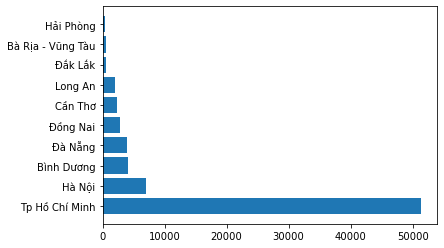

In [9]:
sort_city = df.groupby('Tỉnh thành').count()['Unnamed: 0'].sort_values(ascending=False)[:10]

cities = []
for a, b in sort_city.items():
    cities.append(a)

plt.barh(y=cities, width=sort_city);

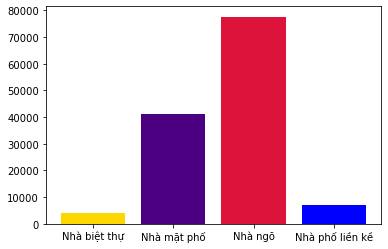

In [32]:
Loaihinh = df.groupby('Loại hình nhà ở').count()['Unnamed: 0']

Loaihinhnhao = []
for a, b in Loaihinh.items():
    Loaihinhnhao.append(a)

plt.bar(x=Loaihinhnhao, height=Loaihinh, color=['gold', 'indigo', 'crimson', 'blue', 'sienna', 'slategrey']);

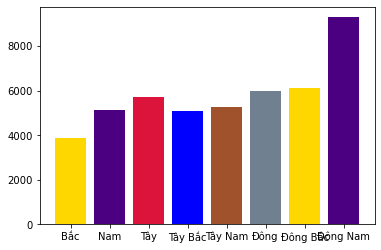

In [11]:
Huong = df.groupby('Hướng cửa chính').count()['Unnamed: 0']

Loaihinhnhao = []
for a, b in Huong.items():
    Loaihinhnhao.append(a)

plt.bar(x=Loaihinhnhao, height=Huong, color=['gold', 'indigo', 'crimson', 'blue', 'sienna', 'slategrey']);

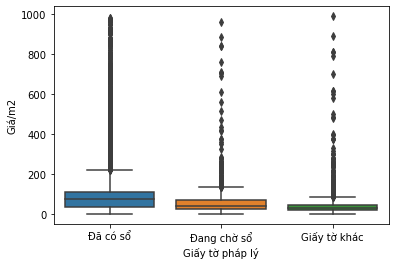

In [21]:
sns.boxplot(data=df, x='Giấy tờ pháp lý', y='Giá/m2');

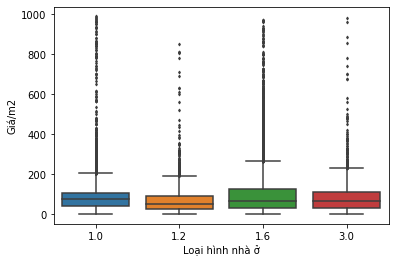

In [22]:
sns.boxplot(data=df, x="Loại hình nhà ở", y='Giá/m2',fliersize=2);